# Библиотека Pandas. Управление данными



[Официальный сайт библиотеки](https://pandas.pydata.org/)

[Руководство пользователя 1](https://pythonist.ru/polnoe-rukovodstvo-po-pandas-dlya-nachinayushhih/)

[Руководство пользователя 2](https://pandas.pydata.org/docs/user_guide/index.html)


На данном занятии разберём некоторые возможности управления (манипулирования) данными в библиотеке Pandas. То, что будет рассмотрено - лишь небольшая часть из богатого функционала библиотеки. Более детально познакомиться с ним можно, читая литературу, статьи в интернет или руководства пользователя, ссылки на которые есть в начале этого блокнота.

Краткая шпаргалка по методам управления данными Pandas выложена в списке ресурсов прошлого занятия.

На прошлом занятии вы рассмотрели типы данных в Pandas, структуры данных, обмен данными с файлом, простейшие возможности визуализации данных. Теперь настала пора разобраться с операциями внутри фреймов данных, с отдельными значениями, со строками, со столбцами, со структурой таблиц, с порядком расположения в них данных.

## Подключение библиотек

Как вы помните, библиотеку **Pandas** предварительно надо подключить. Как всегда, будем для неё использовать псевдоним **pd**.
В примерах у нас будет и работа с числами. Поэтому заранее подключим и библиотеку **NumPy**.


In [ ]:
import pandas as pd
import numpy as np

## <center> 1. Индексы и значения элементов

В качестве примеров будем использовать объекты **Simps** (серия) и **group** (фрейм данных), которые мы создавали на прошлом занятии.

In [ ]:
Simps = pd.Series({'Homer':  'Dad',
                   'Marge':  'Mom',
                   'Bart':   'Son',
                   'Lisa':   'Daughter',
                   'Maggie': 'Daughter'}, name='Simpsons')
Simps

In [ ]:
group = pd.read_csv('stats.csv',  sep = ',')
group


Для удобного ориентирования в структурах данных используются индексы элементов.

#### Series
В одномерном наборе у каждого элемента есть индекс и значение. Так, математическая запись х<sub>5</sub> = 12 означает, что у 5-го элемента одномерного набора x (элемента с индексом 5) значение равно 12. Pandas позволяет получить список всех индексов серии и значений всех элементов.

In [ ]:
Simps.index

In [ ]:
Simps.values

Если требуется узнать значение элемента серии с конкретным индексом, следует после имени серии в квадратных скобках указать индекс нужного элемена. Например, Гомер в семье Симпсонов - отец:

In [ ]:
Simps['Homer']

Аналогичное обращение используется, если требуется изменить значение элемента серии с конкретным индексом. Например, можно сделать того же Гомера суперотцом:

In [ ]:
Simps['Homer']='SuperDad'
Simps

#### DataFrame
Фрейм - двумерный набор, и у каждого элемента есть две координаты - номер строки и номер столбца, где он расположен. Тут аналогия с математической записью:  Y<sub>5,2</sub> = 7.8 означает, что элемент двумерного набора Y, расположенный на пересечении 5-й строки и 2-го столбца равен 7.8.

Pandas позволяет получить список всех индексов серии и значений всех элементов.

In [ ]:
group.index

Действительно, у строк датафрейма group индексы - это их порядковые номера от 0 до 17 с шагом 1.

In [ ]:
group.columns

Вывод показывает, что во фрейме group 5 столбцов с указанными названиями.

In [ ]:
group.values

Как видим, данные, хранящиеся во фрейме group, представляют собой двумерный массив из 18 строк по 5 элементов в каждой.

### Доступ к отдельным элементам
Если требуется узнать значение элемента фрейма, расположенного на пересечении конкретной строки и конкретного столбца, то следует после имени фрейма указать <b>.loc</b> и в квадратных скобках через запятую указать индекс и колонку нужного элемена. Например, в фрейме group узнаем имя 4-го человека по порядку:

In [ ]:
group.loc[4]['Name']

Есть и другие способы.

С помощью метода <b>at</b>

In [ ]:
group.at[4,'Name']

Как значение указанного столбца с указанным индексом

In [ ]:
group['Name'].values[4]

Если строка во фрейме имеет строковый индекс, то обратиться к ней можно и по названию индекса  (метод **loc()**) и по порядковому номеру строки (метод **iloc()**):

In [ ]:
print("Доступ к строке по строковому индексу : ", Simps.loc['Bart'])
print("Доступ к строке по числовому индексу  : ", Simps.iloc[2])

Для того, чтобы изменить значения отдельных элементов фрейма, лучше для обращения к элементу использовать метод <b>at</b>. Для примера увеличим возраст второго студента на 1 год:

In [ ]:
print("Было   : ", group.loc[2,'Age'])
group.at[2,'Age']=group.at[2,'Age']+1
print("Стало  : ", group.loc[2,'Age'])


Попробуйте понять, как в примере ниже был использован метод <b>loc</b>:

In [ ]:
group.loc[group['Name']=='Carl',['Age']]=18
group.head()

## <center> 2. Выделение элементов DataFrame

Ограничим вывод "длинных" таблиц DataFrame восемью строками - по четыре первых и последних:

In [ ]:
pd.options.display.max_rows = 8

### Выделение столбцов

Можно из DataFrame выделить отдельный столбец в виде серии

In [ ]:
group_names = group['Name']
group_names

В предыдущем примере использована *скобочная* нотация, когда при выделении отдельного столбца его имя указывается в квадратных скобках

<code>column_data = df['column_name']</code>

Можно применять и *точечную* нотацию, где имя столбца работает как свойство фрейма, представляющее данный столбец

<code>column_data = df.column_name</code>

Например, так:

In [ ]:
group_names = group.Name
group_names

Можно создать новый DataFrame из нескольких столбцов существующего

In [ ]:
group_NameAgeHei = group[['Name','Age','Height']]
group_NameAgeHei

Можно создать новый DataFrame из нескольких подряд идущих столбцов существующего

In [ ]:
group_part = group[group.columns[1:5]]
group_part

Можно создать новый DataFrame, используя **срез** существующей таблицы (срез - это часть фрейма между указанными индексами или названиями столбцов)

In [ ]:
group_part = group.loc[0:3, 'Name':'Age']
group_part

### Переименование и перестановка столбцов
Чтобы улучшить читаемость кода или облегчить
анализ иногда возникает необходимость переименовать
или изменить порядок колонок во фрейме.

Для переименования отдельной колонки используется метод **rename()**:

In [ ]:
df1 = group.rename(columns={'Age':'Years'})
df1.head(3)

Для перестановки столбцов создают список названий столбцов в необходимом порядке и используют уже знакомый нам способ формирования нового фрейма по именам столбцов существующего фрейма:

In [ ]:
new_cols = ['Name', 'Age', 'Height', 'Weight', 'Sex']
df2=group[new_cols]
df2

### Фильтрация строк

Фильтрация - оставление в наборе данных только тех элементов, которые удовлетворяют некоторому условию.

#### Выбор строк фрейма данных Pandas на основе определенного значения столбца с помощью ‘>’, ‘<’, ‘==’, ‘>=’, ‘<=’, ‘!=’ оператора
Выберем те строки из набора group, которые соответствуют женщинам:

In [ ]:
df1 = group[group['Sex'] == 'F']
df1

Выберем те строки из набора group, которые соответствуют лицам не старше 30 лет:

In [ ]:
df2 = group[group['Age'] <= 30]
df2

Выберем те строки из набора group, в которых есть информация о лицах с именами Bert, Carl и Ruth:

In [ ]:
names = ['Bert','Carl','Ruth']
df3 = group[group['Name'].isin(names)]
df3

Выберем данные о мужчинах ниже 180 сантиметров:

In [ ]:
df4 = group[(group['Sex'] == 'M') & (group['Height'] < 180)]
df4

В данном примере сложное условие (мужчины ниже 180 см) разделено на два простых (мужчины) и (рост меньше 180 см), связанные логической операцией "&" (AND - одновременная истинность - логическое умножение). Если требуется выполнение только одного из простых условий, используется логическая операция "|" (OR - истинность хотя бы одного - логическое сложение).

#### Метод .query()

Метод **.query()** позволяет задавать условие фильтрации в более краткой нотации.

Повторим выбор данных о мужчинах выше 180 сантиметров (обратите внимание на разные кавычки для строк!):

In [ ]:
df44 = group.query("(Sex == 'M') & (Height > 180)")
df44

#### Метод .startswith()

Метод **.startswith()** позволяет задавать правило для начала строки условия фильтрации. В данном примере сформирован новый фрейм, в котором <b>исключены</b> люди, имя которых начинайтся с буквы 'P'. То что данные объекты исключаются, а не сохраняются, указывает символ <b>~</b> перед условием фильтрации.


In [ ]:
df5 = group[~group.Name.str.startswith('P')]
df5.tail()

#### Методы .nlargest() и  .nsmallest()

Позволяют находить строки с наибольшими (наименьшими) значениями указанной колонки:


In [ ]:
df6 = group.nlargest(3,'Age')
df6

Первый параметр 3 указывает, что выделяем трёх людей, старших по возрасту.

## <center> 3. Операции над DataFrame

### Копирование

Если DataFrame предполагается изменять, а его текущий вариант может понадобиться в дальнейшем, то разумно сделать копию текущего варианта.

Сохраним таблицу **group** под именем **group_base**. А саму таблицу **group** в примерах будем менять.

In [ ]:
group_base = group.copy()
group_base

Обратите внимание! простое присваивание <code>group_base = group</code> создаёт не копию текущей таблицы, а сохраняет ссылку на неё в ещё одной переменной.
Покажем это на примере:

In [ ]:
record = {
 'Name' : ['Anit', 'Swil', 'Aisha'],
 'Age'  : [22, 18, 25]}
df0 = pd.DataFrame(record)
print("Base Dataframe :\n", df0)

df1 = df0.copy()
df2 = df0

df1.loc[0,'Age']=55
df2.loc[1,'Age']=66

print("Base Dataframe :\n", df0)

Как видите, изменение **df1** не испортило **df**, а изменение **df2** испортило.

### Удаление

Pandas предоставляют возможность удаления элементов фреймов данных с помощью метода **.drop()** этого датафрейма. Строки или столбцы можно удалить с помощью индексной метки или имени столбца с помощью этого метода.

#### Удаление строк по их индексу

In [ ]:
group.drop([0,2,16], inplace = True)
group

Уточнение <code>inplace = True</code> указывает, что полученный фрейм заменит существующий.

#### Удаление столбцов по их названиям

In [ ]:
group.drop(['Height','Weight'], axis=1, inplace = True)
group

Уточнение <code>axis=1</code> (ось равна 1) указывает, что удаляются столбцы, а не строки (номер оси axis=0).

### Сортировка
Для сортировки значений в датафрейме библиотеки Pandas используется метод **.sort_values()**. Этому методу мы можем передать, среди прочих, следующие параметры:
- by — по какому столбцу или столбцам вести сортировку
- inplace — сохранять ли результат
- ascending — в восходящем (**true** по умолчанию) или нисходящем порядке сортировать

Отсортируем данные таблицы **group** по возрасту:

In [ ]:
group = group_base.copy() # восстановили изначальный вид таблицы
group.sort_values(by = 'Age', inplace = True, ascending = True)
group

А теперь отсортируем данные по двум столбцам в нисходящем порядке. Сначала идут мужчины, а потом женщины. Внутри гендерной группы по убыванию роста.

In [ ]:
group.sort_values(by = ['Sex','Height'], inplace = True, ascending = False)
group

## 4. Агрегирование и группировка данных

При работе с большим (сотни, тысячи, десятки тысяч строк) набором данных желательно иметь краткое ёмкое представление об отдельных характеристиках этого набора.



### Агрегирование
Под агрегированием понимают определение обобщённой числовой характиристики набора данных. Оно выполняется с помощью т.н. агрегирующих функций. Вот список этих функций в Pandas:
- **count()** - число элементов
- **sum()**   - сумма элементов
- **mean()**  - среднее арифметическое элементов
- **min()**   - значение минимального элемента
- **max()**   - значение максимального элемента.

Чаще всего агрегирующие функции применяют к отдельным колонкам фрейма:

In [ ]:
print("Наибольший рост в группе : ", group['Height'].max(), " см")
print("Наименьший вес в группе  : ", group['Weight'].min(), " кг")

Агрегирование можно применять и ко всему фрейму данных

In [ ]:
print("Средние показатели по группе \n", group.mean(numeric_only=True))

Pandas позволяет пользователю создавать и использовать собственные агрегирующие функции. Например, создадим функцию, которая возвращает диапазон значений в аргументе и применим её:

In [ ]:
def amplitude(x):
  return x.max() - x.min()
print("Возрастной диапазон в группе : ", group['Age'].agg(amplitude), " лет")

### Группировка
Группировка данных предполагает разбиение набора данных по определенным
критериям, применение агрегирующей функции к каждой такой группе и объединение результатов. Для выделения групп можно использовать метод **groupby()**. Имеет смысл в качестве группирующего признака выбирать колонку с категориальными данными.

Например, повторим поиск средних значений числовых признаков (возраст, рост, вес) членов нашей группы, разделив группу по категориальному признаку (по полу):

In [ ]:
group.groupby('Sex').mean(numeric_only=True)

Аналогично, можно найти амплитуду возраста отдельно для мужчин и женщин:

In [ ]:
group.groupby('Sex')['Age'].agg(amplitude)

Разберём эту строчку кода. Сначала мы разбили фрейм на группы по полу (очевидно, что получилось две группы). В полученном наборе выделили признак "возраст" и в каждой из обеих групп определили размах значений. В результате получили серию из двух чисел с индексами "F" и "М".

## <font color='indigo'> 5*. Слияние, объединение и конкатенация данных</font>
<font color='indigo'> * - материал данной темы достаточно сложен и рекомендуется для изучения студентам, желающим получить оценки 4 и 5 на экзамене.</font>

При работе с несколькими фреймами данных может возникнуть задача сделать из них один, общий фрейм, который включал бы в себя все данные из выбранных фреймов. Естественно, Pandas поможет это сделать, предоставляя возможность выполнить это разными способами.

### Конкатенация (**concatenate**)
Самый простой из них - конкатенация (склеивание), знакомая программистам по работе со строками, которые склеиваются друг за другом. Фреймы данных в Pandas прямоугольные, поэтому склеивать их можно по вертикали, второй под первым (вдоль оси 0) или по горизонтали, второй справа от первого (вдоль оси 1).

Для примера создадим три небольших датафрейма и применим к ним оба способа конкатенации:

In [ ]:
import numpy as np
df1 = pd.DataFrame(np.array([1,2,3,4,5,6,7,8,9]).reshape(3, 3),
                  index=['1', '2', '3'],
                  columns=['c1', 'c2', 'c3'])
df1

In [ ]:
df2 = pd.DataFrame(np.array([11,12,13,14,15,16]).reshape(2, 3),
                  index=['3', '4'],
                  columns=['c1', 'c2', 'c3'])
df2

In [ ]:
df3 = pd.DataFrame(np.array([21,22,23,24,25,26]).reshape(3, 2),
                  index=['1', '2', '3'],
                  columns=['c3', 'c4'])
df3

Склеим первые два датафрейма сначала по вертикали ,а потом по горизонтали:

In [ ]:
pd.concat([df1, df2], axis=0)

In [ ]:
pd.concat([df1, df2], axis=1)

Как видим, по вертикали имеет смысл склеивать фреймы с одинаковым набором колонок. Если такие фреймы склеить по горизонтали, то колонки дублируются с появлением пустых ячеек.

Выполним аналогичные операции между 1 и 3 фреймами:


In [ ]:
pd.concat([df1, df3], axis=0)

In [ ]:
pd.concat([df1, df3], axis=1)

Понятно, что по горизонтали имеет смысл склеивать фреймы с одинаковыми наборами индексов.

Например, если у нас появился фрейм с тем же набором колонок, что и group, но с данными других людей, его можно подклеить к group по вертикали (axes=0). А если появится фрейм с городами проживания людей из group, (но с такими же индексами!), то подклеивать надо по горизонтали (axes=1).

### Объединение (**join**)
Эта операция предполагает присоединение к текущему фрейму данных другого фрейма <u>с разными именами колонок</u> на основе общности индексов. При этом могут быть разные варианты обработки несовпадающих индексов:
- **inner join** (по умолчанию)  - внутреннее объединение: остаются строки, индексы которых есть в обоих фреймах (таблицах)
- **left join**  - объединение слева: остаются строки, индексы которых есть только в текущем фрейме
- **right join**  - объединение справа: остаются строки, индексы которых есть только в присоединяемом фрейме
- **outer join**  - внешнее объединение: остаются все строки из обоих фреймов.

При этом отсутствующе значения обозначаются NaN.



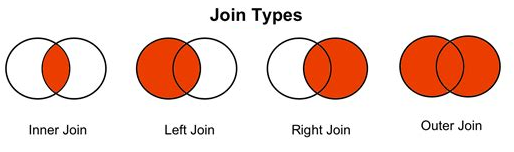

In [ ]:
dfL = pd.DataFrame(np.array([1,2,3,4,5,6,7,8,9]).reshape(3, 3),
                  index=['1', '2', '3'],
                  columns=['c1', 'c2', 'c3'])
dfR = pd.DataFrame(np.array([21,22,23,24,25,26]).reshape(3, 2),
                  index=['1', '2', '4'],
                  columns=['c4', 'c5'])
print("Основной фрейм \n",dfL)
print("\nПрисоединяемый фрейм \n",dfR)
print("\nInner Join \n", dfL.join(dfR,how='inner'))
print("\nLeft Join \n", dfL.join(dfR))
print("\nRight Join \n", dfL.join(dfR,how='right'))
print("\nOuter Join \n", dfL.join(dfR,how='outer'))


### Слияние (**Merge**)
Если в объединяемых фреймах будут присутствовать одноимённые столбцы, то в общем случае метод **join()** выдаст ошибку, ибо непонятно, что как эти столбцы объединять.

Возможно ситуация, когда данные столбцы являются индексами по сути, т.е. однозначно идентифицируют объект (строчку) фрейма данных. Тогда для объединения удобно ориентироваться по данным этих столбцов, считая их индексами. В этом случае удобно применять метод **merge()**. Параметрами этого метода являются названия объединяемых фреймов, способ объединения (как в методе **join()**) и название столбца, который выполняет роль признака соответствия строк обоих фреймов.


Пусть у нас будут два фрейма по две колонки в каждом. В одном это колонки "имя" и "баллы по математике", а в другом "имя" и "баллы по физике":

In [ ]:
df1=pd.DataFrame({'name': ['Петя','Вася','Коля','Нина','Егор'],
                  'math': [84,57,60,90,74]})
df2=pd.DataFrame({'name': ['Вася','Олег','Саша','Петя'],
                  'phis': [84,57,60,90]})
print("Оценки по математике \n",df1)
print("\nОценки по физике \n",df2)

Признаком для связывания строк разных фреймов будет, естественно, "имя":

In [ ]:
print("\nInner Merge \n", pd.merge(df1, df2, on = 'name'))
print("\nLeft Merge \n", pd.merge(df1, df2, on = 'name', how='left'))
print("\nRight Merge \n", pd.merge(df1, df2, on = 'name', how='right'))
print("\nOuter Merge \n", pd.merge(df1, df2, on = 'name', how='outer'))

Обратите внимание на следующие моменты:
- если **join()** вызывался у текущего фрейма, то **merge()** - это функция Pandas (вызывается у pd); при этом имена обоих фреймов (сначала левого, потом правого) указываются в параметрах метода;
- способом объединения по умолчанию является **inner**;
- связывающая колонка указывается в параметре **on**;
- порядок данных в связывающей колонке на важен.


## <font color='indigo'>6*. Временные ряды библиотеки Pandas</font>
<font color='indigo'> * - материал данной темы достаточно сложен и рекомендуется для изучения студентам, желающим получить оценки 4 и 5 на экзамене.</font>

Библиотека Pandas была разработана в расчете на построение финансовых моделей и поэтому она содержит широкий набор инструментов для работы с датой и временем.

Мы рассмотрим лишь некоторые возможности работы с временными рядями в Pandas. Более подробная информация есть в [руководстве пользователя](
https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html)

Данные о дате и времени могут находиться в нескольких видах:
- **Метки даты/времени** ссылаются на конкретные моменты времени (например, 12 мая 2022 года в 07:00 утра).
- **Временные интервалы и периоды** ссылаются на отрезки времени между конкретными начальной и конечной точками (например, 2023 год). Периоды обычно представляют собой особый случай интервалов, с
непересекающимися интервалами одинаковой длительности (например, 24-часовые периоды времени,
составляющие сутки).
- **Временная дельта** (она же продолжительность) относится к отрезку времени конкретной длительности (например, 12.77 с).


### Структуры данных для временных рядов библиотеки Pandas
- Для меток даты/времени библиотека Pandas предоставляет тип данных **Timestamp**. Этот тип  типа данных **datetime** языка Python. Для использования в качестве индекса применяется аналогичный тип **DatetimeIndex**.
- Для периодов времени используется тип данных **Period**. Он кодирует интервал времени фиксированной периодичности. Соответствующая индексная
конструкция — **PeriodIndex**.
- Для временных дельт (продолжительностей) используется тип данных **Timedelta**. Соответствующая индексная конструкция — **TimedeltaIndex**.

Основными объектами даты/времени являются объекты **Timestamp** и **DatetimeIndex**. для обращения к ним удобно использовать функцию **pd.to_datetime()**, которая умеет распознавать запись даты/времени в разных формататах. При передаче в функцию **pd.to_datetime()** отдельной даты она возвращает **Timestamp**, при передаче ряда дат
по умолчанию возвращает **DatetimeIndex**:


In [ ]:
from datetime import datetime
import pandas as pd
dates = pd.to_datetime([datetime(2023, 7, 13), '14th of July, 2023', '2023-Jul-16', '17-07-2023', '20230718'])
print(dates)

Объект **TimedeltaIndex** создается, например, при вычитании одной даты из другой. Вычтем из серии dates начальную дату:

In [ ]:
dates - dates[0]

### Регулярные последовательности дат/времени
Чтобы облегчить создание регулярных последовательностей, Pandas предоставляет несколько функций:
- **pd.date_range()** — для меток даты/времени,
- **pd.period_range()** — для периодов времени и
- **pd.timedelta_range()** — для временных дельт.

Функция **pd.date_range()** создает регулярную последовательность дат, принимая на входе начальную дату, конечную дату и необязательный
код периодичности. По умолчанию период равен одному дню:


In [ ]:
pd.date_range('2023-07-03', '2023-07-10')


В качестве альтернативы можно также задать диапазон дат с помощью не начальной и конечной точек, а посредством начальной точки и количества периодов времени:

In [ ]:
pd.date_range('2023-07-03', periods=8)

Можно изменить интервал времени, поменяв аргумент **freq** , имеющий по умолчанию значение 'D'. Например, в следующем фрагменте создадим диапазон часовых меток даты/времени:


In [ ]:
pd.date_range('2015-07-03', periods=8, freq='H')

## Чтение данных временных рядов из файла и простейшая их обработка
Для начала загрузите в среду Google Colab файл 'wether.csv'. Его имя должно появиться в списке доступных файлов вверху слева от текста этого блокнота.


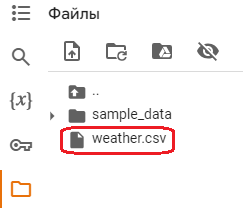

Загрузим его содержимое:

In [ ]:
df1=pd.read_csv('weather.csv', sep=';')
df1

Загрузились данные (температура и давление) о погоде в Тюмени, взятые на сайте **rp5.ru**.
- Первая колонка - дата и время сбора показаний датчиков.
- Вторая колонка - температура в градусах Цельсия
- Третья колонка - давление в мм.рт.ст.


Заметно, что данные стоят в обратном порядке по времени. Отсортируем их по признаку **datetime**:

In [ ]:
w=df1.sort_values(by = 'datetime')
w

Не получилось. В показанних последник записях фрейма стоит 2022 год. Но мы знаем, что есть очень много данных за 2023 год.

Причина в том, что в колонке время хранится в виде строки. А строка '01.01.2023 02:00' по алфавитному принципу стоит раньше строки '31.12.2022 02:00', хотя это более поздняя календарная дата. Выход: привести тип данных колонки **datetime** к типу **DatetimeIndex**. Обратите внимание, в качестве параметра метода **to_datetime** указан **format** (шаблон), который подсказывает методу, какой элемент строки отвечает за тот или иной элемент даты/времени, иначе возможна путаница:

In [ ]:
df1.datetime = pd.to_datetime(df1['datetime'],format='%d.%m.%Y %H:%M')
df1

Даже внешне поменялись данные колонки **datetime**. Для уверенности посмотрим типы данных в колонках этого фрейма:

In [ ]:
df1.dtypes

А вот теперь отсортируем данные по дате/времени:

In [ ]:
w=df1.sort_values(by = 'datetime')
w

### График временного ряда
Временные ряды интересно визуализировать. Посмотрим график температуры в Тюмени за весь период, который представлен во фрейме.

Для этого вначале сделаем колонку даты/времени индексом:

In [ ]:
w.index=w['datetime']
w.drop(['datetime'], axis=1, inplace = True)
w

И построим график температуры. При этом на горизогтальной оси будут отмечаться индексы записей, т.е., временные метки.

In [ ]:
w['t'].plot(title = 'Температура в Тюмени')

Хорошо видна годовая периодичность значения температуры.

Выделим отдельно погоду за последний месяц 2023 года. В загруженном датасете доступны данные только до 23 декабря 2023 года.

In [ ]:
w1=w[w.index >= pd.to_datetime('2023-12-01')]
w1

Построим график:

In [ ]:
w1['t'].plot(title = 'Температура в декабре')

Pandas предоставляет методы для изменения частоты дискретизации данных временных рядов. Изначально временные отметки шли с интервалом 3 часа (6 отметок в сутки). В примере ниже мы формируем датасет ежедневных параметров декабря заменив данные одного дня (параметр 'D') средним значением (mean):

In [ ]:
w_daily=w1.resample('D').mean()
w_daily

Фо фрейме осталось 22 строки (по числу дней). Построим по ним график:

In [ ]:
w_daily['t'].plot(title = 'Температура в декабре')

Заметно, что пропала плавность и график выглядит как ломаная

Pandas позволяет применить к значениям временного ряда сглаживание методом скользящей средней. Суть метода в том, что значение каждой точки временного ряда заменяется средним значением во временном диапазоне с центром в данной временной точке. Размер диапазона (**window**) задаётся:

In [ ]:
w_rolling = w1.rolling(window=5).mean()
w_rolling['t'].plot(title = 'Температура в декабре')

## 7. Математика над DataFrame

### Арифметические операции

Для выполнения примеров создадим простой числовой датафрейм




In [ ]:
df_m = pd.DataFrame(np.linspace(-5,6,12).reshape(4, 3),
                  index=['ind_1', 'ind_2', 'ind_3', 'ind_4'],
                  columns=['A', 'B', 'C'])
df_m

умножаем все на 1.2, берём только абсолютные значения

In [ ]:
df_m = abs(df_m * 1.2)
df_m

вычитаем первую строку из каждой строки объекта DataFrame. Т.к. нам удобнее использовать индекс первой строки (0), а не её название <b>ind_1</b>, то вместо функции <b>loc</b> используем аналогичную функцию <b>iloc</b>, где вместо названий надо ставить индексы (порядковые номера).

In [ ]:
df_m = df_m - df_m.iloc[0]
df_m

- формируем новый фрейм s из фрейма df_m, сохранив  второе и третье поле <code>[1:3]</code> 4-ой строки <code>[3]</code>:
- добавляем в фрейме s нулевой столбец с имененм <b>E</b>

Обратите внимание: т.к. в s всего одна строка, фрейм s выведен на консоль как серия (в столбик)

In [ ]:
s = df_m.iloc[3][1:3]
s['E'] = 0
s

Находим сумму полученных датафреймов

In [ ]:
df_m = df_m + s
df_m

Т.к. в первом слагаемом не было столбца E, а во втором столбца A, то они воспринимались как несуществующие
значения (NaN - not a number). А сумма NaN и любого числа будет NaN.